<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week06/random_forests_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2lsUt_WHm03A_3PYoy6bCYHZI6wpTcTc0412kynMrNyds9AwPHhjt6dp2tL2FmEGc1tD7x1zJU37H/pub?output=csv'
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [31]:
# Explore the data
print(df.duplicated().sum())
print(df.isna().sum().sum())

df.info()

0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [32]:
# Set the features and targen
y = df['MedHouseVal']
X = df.drop(columns = 'MedHouseVal')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [33]:
# Instantiate the model
rf = RandomForestRegressor(random_state = 42)

In [34]:
# Investigate the hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [35]:
# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions
rf.predict(X_train)

array([2.29831  , 3.0255702, 2.01759  , ..., 2.14151  , 2.73364  ,
       3.2573802])

In [37]:
# Evaluate the model
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score, rf_test_score)

0.9726163038386978 0.8078655075367563


In [38]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

42

In [39]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index = depths, columns = ['Test Score', 'Train Score'])
for depth in depths:
  model = RandomForestRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)

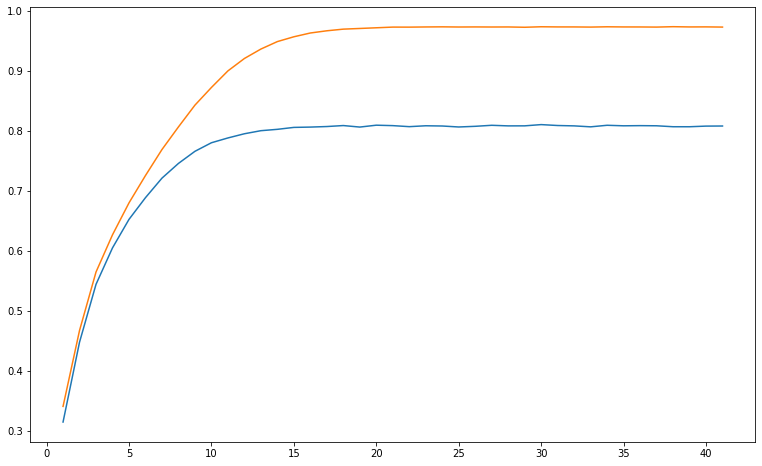

In [41]:
# Determine which max_depth gives the best R2 score
plt.figure(figsize = (13, 8))
plt.plot(scores)

In [44]:
# Sort the scores dataframe
scores = scores.sort_values(by = 'Test Score', ascending = False)
scores.head()

,Test Score,Train Score
30,0.810343,0.97333
20,0.809362,0.971634
34,0.809219,0.973289
27,0.809195,0.972928
31,0.808837,0.973069


In [56]:
# Tune the model by n_estimators
n_ests = range(50, 300, 50)
scores2 = pd.DataFrame(index = n_ests, columns = ['Test Score', 'Train Score'])
for est in n_ests:
  model = RandomForestRegressor(max_depth = 30, n_estimators = est)
  model.fit(X_train, y_train)
  scores2.loc[est, 'Test Score'] = model.score(X_test, y_test)
  scores2.loc[est, 'Train Score'] = model.score(X_train, y_train)
scores2.head()

,Test Score,Train Score
50,0.803615,0.971398
100,0.807519,0.973018
150,0.808147,0.97337
200,0.809304,0.973604
250,0.809101,0.973743
